# **transito planetário usando o método Box Least Square** (?)
* PET - Física
* Petianos: Emanuel e Ylana
* Data: 16 de agosto de 2024

`notebook`
tararararararara. Serão vistos:

* Introdução (fotometria e trânsito e tess?);
* método do box least square;
* 



In [50]:
import lightkurve as  lk
import matplotlib.pyplot as plt 

%matplotlib inline

In [46]:
%load_ext version_information
%version_information matplotlib, lightkurve

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.11.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22621 SP0
matplotlib 3.8.0
lightkurve 2.4.2
Sun Jul 28 22:03:07 2024 Hora oficial do Brasil

In [47]:
TIC = 'TIC 364186197'

#### nome do artigo
#### doppler confirmation of tess planets candidate toi-1408.01
## G. A. galazutdinov

`oi`

In [35]:
search_result = lk.search_lightcurve(TIC, mission = 'Tess')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 16,2019,SPOC,120,364186197,0.0
1,TESS Sector 18,2019,SPOC,120,364186197,0.0
2,TESS Sector 19,2019,SPOC,120,364186197,0.0
3,TESS Sector 17,2019,SPOC,120,364186197,0.0
4,TESS Sector 24,2020,SPOC,120,364186197,0.0
5,TESS Sector 25,2020,SPOC,120,364186197,0.0
6,TESS Sector 57,2022,SPOC,20,364186197,0.0
7,TESS Sector 58,2022,SPOC,20,364186197,0.0
8,TESS Sector 59,2022,SPOC,20,364186197,0.0


In [48]:
search_result = lk.search_lightcurve(TIC, mission = 'Tess', author = ['TESS-SPOC','SPOC'], sector=[16,17,18,19])
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 16,2019,SPOC,120,364186197,0.0
1,TESS Sector 17,2019,SPOC,120,364186197,0.0
2,TESS Sector 18,2019,SPOC,120,364186197,0.0
3,TESS Sector 19,2019,SPOC,120,364186197,0.0
4,TESS Sector 16,2019,TESS-SPOC,1800,364186197,0.0
5,TESS Sector 17,2019,TESS-SPOC,1800,364186197,0.0
6,TESS Sector 18,2019,TESS-SPOC,1800,364186197,0.0
7,TESS Sector 19,2019,TESS-SPOC,1800,364186197,0.0


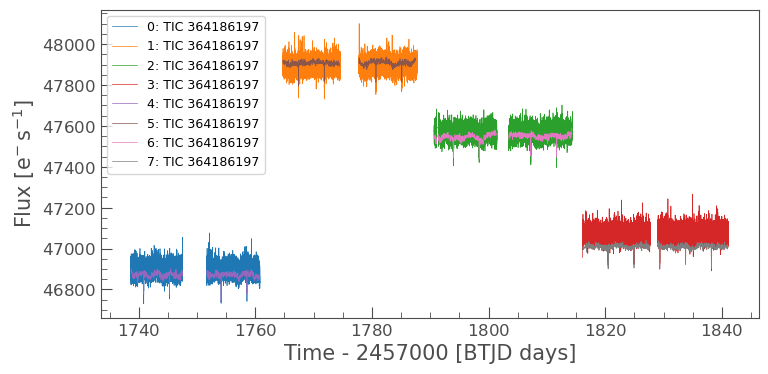

In [51]:
tess = search_result.download_all()
tess.plot()
plt.legend(fontsize="9", loc ="upper left")


In [42]:
tess = tess.stitch() #.flatten(window_length = 1790).remove_outliers()
tess.plot()

AttributeError: object has no attribute stitch

In [ ]:
tess = tess.flatten(window_length = 1790).remove_outliers()
tess.plot(linewidth = 0, marker = '.',  color = 'black');


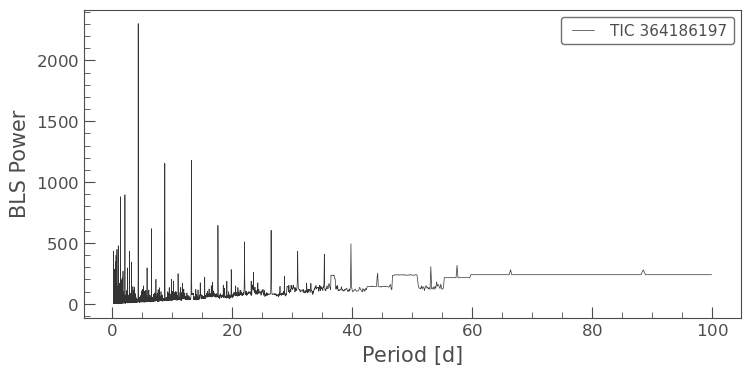

In [37]:
pg = tess.to_periodogram(method='bls', maximum_period=100)
pg.plot(view='period');

In [38]:
planet_period = pg.period_at_max_power
planet_b_t0 = pg.transit_time_at_max_power
planet_b_dur = pg.duration_at_max_power

# Check the value for period
planet_period

<Quantity 4.42463484 d>

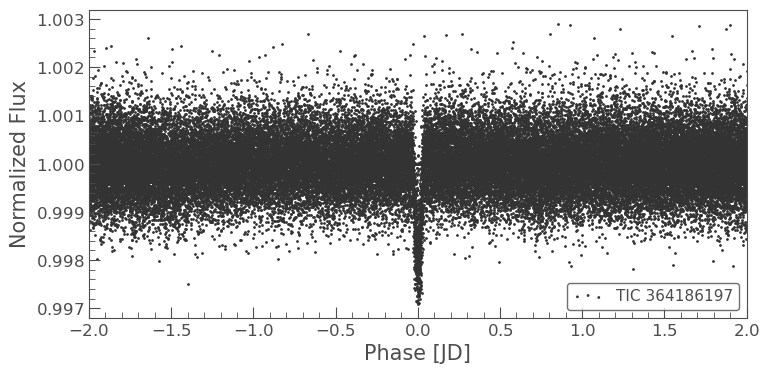

In [39]:
ax = tess.fold(period=planet_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-2, 2);

In [40]:
planet_b_model = pg.get_transit_model(period=planet_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)


(-2.0, 2.0)

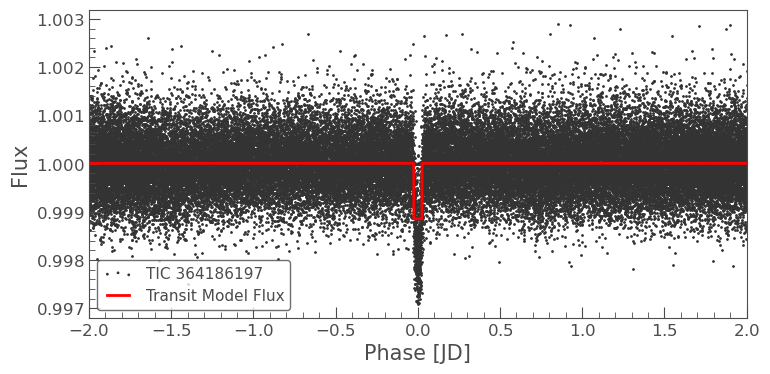

In [41]:
ax = tess.fold(period=planet_period, epoch_time=planet_b_t0).scatter()
planet_b_model.fold(planet_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-2, 2)
